In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
weather_df = pd.read_csv("https://raw.githubusercontent.com/kurianbenoy/DataminingLab/master/day-cnt.csv")

In [3]:
weather_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
weather_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [6]:
numerical_cols = ["temp", "atemp", "hum", "windspeed"]
categorical_cols = ["season", "yr", "mnth", "holiday", "weekday", "workingday","weathersit"]

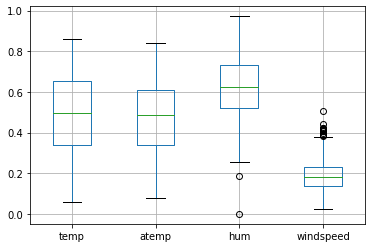

In [7]:
boxplot = weather_df.boxplot(column=numerical_cols)

## Use standard deviation outlier mechanism

(If it's 2* SD away from mean of data point, consider a outlier)

In [8]:
mean_value = np.mean(weather_df["temp"])
std_value = np.std(weather_df["temp"])

In [9]:
mean_value

0.49538478850889184

In [35]:
std_value

0.18292574738241338

1. Count no of outliers corresponding to this method?
2. Replace those outliers with mean value of attribute corresponding.

In [10]:
outlier_range = (mean_value-2*std_value, mean_value+2*std_value)

In [11]:
outlier_range

(0.12953329374406508, 0.8612362832737186)

In [12]:
outlier_temp = weather_df[~weather_df["temp"].between(0.12953329374406508, 0.8612362832737186)]

In [13]:
# number of outliers are:
outlier_temp.shape

(6, 16)

In [20]:
weather_df[~weather_df["temp"].between(0.12953329374406508, 0.8612362832737186)].loc[:, "temp"] = mean_value
outlier_temp["temp"] = mean_value

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
outlier_temp

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
21,22,2011-01-22,1,0,1,0,6,0,1,0.495385,0.079070,0.400000,0.171970,93,888,981
22,23,2011-01-23,1,0,1,0,0,0,1,0.495385,0.098839,0.436522,0.246600,150,836,986
23,24,2011-01-24,1,0,1,0,1,1,1,0.495385,0.117930,0.491739,0.158330,86,1330,1416
368,369,2012-01-04,1,1,1,0,3,1,2,0.495385,0.119337,0.414583,0.184700,95,2273,2368
407,408,2012-02-12,1,1,2,0,0,0,1,0.495385,0.101658,0.464583,0.409212,73,1456,1529
553,554,2012-07-07,3,1,7,0,6,0,1,0.495385,0.804913,0.492083,0.163554,1448,3392,4840


**The number of outlier are: 6**

Also we have replaced outlier temperature with mean temperature.

Let's take a look at weather_df, distribution now.

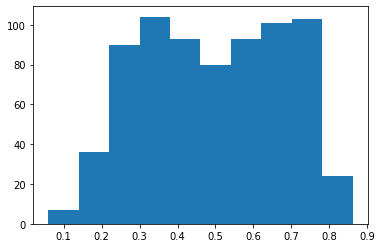

In [21]:
plt.hist(weather_df["temp"])
plt.show()

### Humidity (numerical column)

threshold - 3 outlier

In [63]:
stats.zscore(weather_df["hum"])

array([ 1.25017133e+00,  4.79112983e-01, -1.33927398e+00, -2.63181557e-01,
       -1.34149414e+00, -7.70264869e-01, -9.07725520e-01, -6.46806727e-01,
       -1.36109625e+00, -1.01858632e+00,  4.10800695e-01, -1.99176112e-01,
       -1.10640938e+00, -6.32804219e-01, -9.07346125e-01, -1.01273379e+00,
       -6.35094644e-01,  1.64245234e+00,  7.99856843e-01, -6.29242115e-01,
       -1.20009199e+00, -1.60114828e+00, -1.34455039e+00, -9.56604321e-01,
       -7.68421051e-02,  1.64830487e+00,  4.18782055e-01,  1.16031078e+00,
        1.67530824e-01,  6.62396192e-01, -1.69632436e-01,  1.41690868e+00,
        1.03647324e+00, -1.33538868e+00, -2.99842415e-01,  2.11669686e+00,
       -4.18466776e-01,  7.75926816e-01, -6.32164867e-01, -9.35217650e-01,
       -1.33844493e+00, -8.53851343e-01, -5.88253338e-01, -1.19792803e+00,
       -1.77094187e+00, -2.20292593e+00, -1.43619550e+00, -8.63434595e-01,
       -7.81464066e-01, -3.09121050e+00, -1.54616402e+00, -1.60850130e-01,
       -3.52107673e-01, -

In [67]:
stats.zscore(weather_df["hum"])>3

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [24]:
outlier_hum = weather_df[stats.zscore(weather_df["hum"]) >3]

In [25]:
outlier_hum.shape

(0, 16)

So there are no outlier with threshold 3 in the given dataset. So since no outlier, we needn't replace with mean.

## Now let's look at windspeed

In [26]:
from scipy.stats import iqr

In [27]:
intr_qr = iqr(weather_df['windspeed'], axis=0)

In [28]:
q75,q25 = np.percentile(weather_df.loc[:,'windspeed'],[75,25])
max = q75+(1.5*intr_qr)
min = q25-(1.5*intr_qr)

max, min

(0.38061125, -0.012446750000000034)

In [29]:
weather_df.loc[weather_df['windspeed'] < min,'windspeed'] = np.nan
weather_df.loc[weather_df['windspeed'] > max,'windspeed'] = np.nan

**Checking for NA values**

In [30]:
weather_df.isna().sum()

instant        0
dteday         0
season         0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp           0
atemp          0
hum            0
windspeed     13
casual         0
registered     0
cnt            0
dtype: int64

**Drop NA value**

In [31]:
weather_df = weather_df.dropna()

In [32]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 718 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     718 non-null    int64  
 1   dteday      718 non-null    object 
 2   season      718 non-null    int64  
 3   yr          718 non-null    int64  
 4   mnth        718 non-null    int64  
 5   holiday     718 non-null    int64  
 6   weekday     718 non-null    int64  
 7   workingday  718 non-null    int64  
 8   weathersit  718 non-null    int64  
 9   temp        718 non-null    float64
 10  atemp       718 non-null    float64
 11  hum         718 non-null    float64
 12  windspeed   718 non-null    float64
 13  casual      718 non-null    int64  
 14  registered  718 non-null    int64  
 15  cnt         718 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 95.4+ KB


In [33]:
weather_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000
mean,366.364903,2.511142,0.498607,6.557103,0.029248,2.997214,0.685237,1.398329,0.497214,0.476126,0.630683,0.186392,855.814763,3671.583565,4527.398329
std,211.116876,1.106221,0.500347,3.439284,0.168618,2.000695,0.464745,0.546420,0.183533,0.163076,0.141107,0.071791,689.457718,1560.879937,1937.695290
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,184.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.338125,0.338045,0.524583,0.134331,317.250000,2517.250000,3206.500000
50%,364.500000,3.000000,0.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.504655,0.491160,0.630833,0.178802,725.500000,3676.500000,4566.500000
75%,549.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.656667,0.611120,0.732813,0.230724,1119.500000,4805.500000,6021.250000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.378108,3410.000000,6946.000000,8714.000000
